In [1]:
import pandas
import lucem_illud
import gensim
import scipy as sp
import numpy as np
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import matplotlib.pyplot as plt #For graphics
import spacy
import nltk

In [2]:
fanficW2V2 = gensim.models.word2vec.Word2Vec.load('fanfictokenizedW2V')

In [16]:
fanficW2V2.most_similar(positive=['man', 'woman'], negative = ['girl'])

[('teen', 0.7494782209396362),
 ('hunter', 0.7484487891197205),
 ('dragon', 0.6209247708320618),
 ('redhead', 0.6162632703781128),
 ('boy', 0.6125994920730591),
 ('creature', 0.6051490306854248),
 ('angel', 0.6036409735679626),
 ('werewolf', 0.5984880328178406),
 ('chimera', 0.5974171161651611),
 ('Doctor', 0.583293080329895)]

In [17]:
fanficW2V = gensim.models.word2vec.Word2Vec.load('fanficfullW2V')

In [18]:
numWords = 100
targetWords = fanficW2V.wv.index2word[:numWords]

In [19]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(fanficW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-5.6901842e-01, -2.0789852e+00,  8.8198352e-01, ...,
         6.4526314e-01, -4.2814348e-02, -6.7642844e-01],
       [-2.8259909e-01, -8.9048308e-01,  1.0370070e+00, ...,
         1.2171251e+00, -4.2175305e-01,  1.2725075e-01],
       [-1.4421146e-01, -4.0552661e-01, -3.5381937e-01, ...,
         6.4102006e-01,  7.3053288e-01, -6.9535866e-02],
       ...,
       [-8.2143497e-01, -2.3607327e-01,  4.7920796e-01, ...,
         5.4907256e-01, -1.3733684e-01,  7.8615808e-01],
       [-4.1101304e-01,  1.6944081e-01,  7.6594360e-02, ...,
         6.1867297e-01,  5.6446163e-04,  2.8095135e-01],
       [-1.1712598e+00, -1.2964691e+00,  1.9726053e+00, ...,
        -1.1244617e-01, -1.8673214e+00, -7.5847119e-01]], dtype=float32)

In [20]:
pcaWords = sklearn.decomposition.PCA(n_components = 100).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)

tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

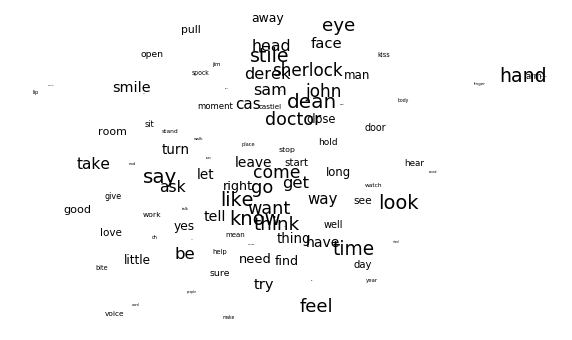

In [24]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [26]:
fanfic_df = pandas.read_csv("fanfic_data.csv")
fanfic_df

,Unnamed: 0,work_id,title,author,rating,category,fandom,relationship,character,additional tags,...,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body,series
0,0,29767170,"screamin' at the cars, hey, i wanna get better",['sydneygremlins'],General Audiences,M/M,Supernatural,"Castiel/Dean Winchester, Dean Winchester & Sam...","Dean Winchester, Sam Winchester, Castiel, (Cas...","Sobbing, ok. ok. [composes myself], i can writ...",...,1595.0,1/1,6.0,34.0,1.0,207,"['dementoreos', 'Aerinvel', 'anaruby32822', 'd...",['DodaOz'],"From here, the cars look like brightly coloure...",Supernatural
1,1,29713014,How Many More Times,['OneShotWonder'],Not Rated,Gen,Supernatural,NaN,"Dean Winchester, Sam Winchester","Season/Series 04, Case Fic, Witches, Dean Winc...",...,4063.0,11/?,1.0,11.0,1.0,155,"['CharlotteL15', 'RavenWingSeraph', 'The_Unfor...",['Indigo_Guardian_Phantom_Knight'],"""Fucking witches."" Dean spat and rolled his ey...",Supernatural
2,2,27095071,Back Together Again,"['Sanemind', 'The_insane_mind']",Teen And Up Audiences,M/M,Supernatural,"Castiel/Dean Winchester, Sam Winchester & Orig...","Rowena MacLeod, Original Female Character(s), ...","Twins, Familiars, Sam Winchester has a kid, De...",...,1945.0,3/4,NaN,2.0,NaN,97,"['FoxCrafts', 'Castiel_is_my_spirit_animal']",[],The fam was researching in the bunker when the...,Supernatural
3,3,29652519,Three Days,['Hunter67'],Explicit,"F/F, F/M, Multi",Supernatural,"Castiel/Dean Winchester, Dean Winchester/Sam W...","Fem Dean - Character, Dean Winchester, Female ...","Destiel - Freeform, Wincest - Freeform, Winces...",...,7002.0,5/?,1.0,15.0,3.0,586,"['IsleFlightlessBirds', 'reesespuffs1', 'Casti...","['Indigo_Guardian_Phantom_Knight', 'Castiel_is...",Dean slammed his bag down onto the table. Tire...,Supernatural
4,4,29766396,Don't Think About: Dean Bottoming For Teen Sam,['ficforthought'],Explicit,M/M,Supernatural,Dean Winchester/Sam Winchester,"Dean Winchester, Sam Winchester","Weecest, Bottom Dean Winchester, Top Sam Winch...",...,609.0,1/1,6.0,34.0,1.0,498,"['DieTheSlashAddict', 'screamingsyral', 'Natty...",['InsatiableFanfictionLurker'],The headcanon: Sam and Dean have been fooling ...,Supernatural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,181,28751190,Bun in the Oven,['TwilightDeviant'],Teen And Up Audiences,M/M,Teen Wolf (TV),Chris Argent/Peter Hale,"Peter Hale, Chris Argent, Derek Hale","Mpreg, Post Mpreg, Not Malia, oc child - Freef...",...,8264.0,2/2,10.0,84.0,9.0,841,"['RoseGlass', 'TooFarAway', 'KaijuQueen', 'bin...","['bindsy', 'lettucewon', 'KaybirdFangirl', 'Fi...","""Hello there.""Peter smiled and waved at the ti...",Teen Wolf
11499,182,28823937,Backstage Passes,['Thorny_Rose_463'],Teen And Up Audiences,F/M,Teen Wolf (TV),"Allison Argent/Scott McCall, Lydia Martin/Stil...",NaN,Alternate Universe - Human,...,3732.0,1/1,NaN,NaN,NaN,105,[],[],\nCast\n\n\nHolland Roden as Lydia Martin\n\nD...,Teen Wolf
11500,183,28824252,Jealousy,['Roadtrip78'],Mature,M/M,Teen Wolf (TV),Derek Hale/Stiles Stilinski,"Derek Hale, Stiles Stilinski, Sheriff Stilinski","Gay Male Character, Male Homosexuality, POV Th...",...,1272.0,1/1,NaN,77.0,2.0,1760,"['ManagerNoly', 'Gaticu', 'ren8991', 'cierra03...","['JudgeH', 'Saracain']",Stiles was dragged in to the area where they w...,Teen Wolf
11501,184,25519909,Pack of Morons (Translated),['breannab_nun'],Mature,"F/F, F/M, M/M",Teen Wolf (TV),"Derek Hale/Stiles Stilinski, Vernon Boyd/Erica...","Stiles Stilinski, Derek Hale, Scott McCall (Te...","Alpha Stiles Stilinski, Bad Alpha Scott McCall...",...,48053.0,25/60,84.0,389.0,101.0,16595,"['AnonQaQ', 'kadja83', 'babygurlbrook', 'odd_d...","['Yazav', 'babygurlbrook', 'kadja83', 'SmileyK...",Chapter 1 EnjoyLeave a comment please and Than...,Teen Wolf


In [27]:
fanfic_df.dropna(subset=["body"], inplace=True) #removes empty stories
fanfic_df.fillna(0, inplace=True) #for stories with 0 hits, kudos, or comments

In [28]:
fanfic_df['body'] = fanfic_df['body'].str.slice(start = 0, stop = 500000)

In [ ]:
fm_df = supernatural_df[(fanfic_df.category == "F/M")]

In [ ]:
mm_df = supernatural_df[(fanfic_df.category == "M/M")]

In [ ]:
ff_df = supernatural_df[(fanfic_df.category == "F/F")]

In [ ]:
MMW2V = gensim.models.word2vec.Word2Vec(mm_df['tokenized_sents'].sum())

In [ ]:
FFW2V = gensim.models.word2vec.Word2Vec(ff_df['tokenized_sents'].sum())

In [ ]:
FMW2V = gensim.models.word2vec.Word2Vec(fm_df['tokenized_sents'].sum())